In [149]:
import numpy as np
import matplotlib.pyplot as plt
import math

R1 = 1415595.9112205505 N
R2 = -896575.228282571 N
M3 = -20421991.310880784 Nm


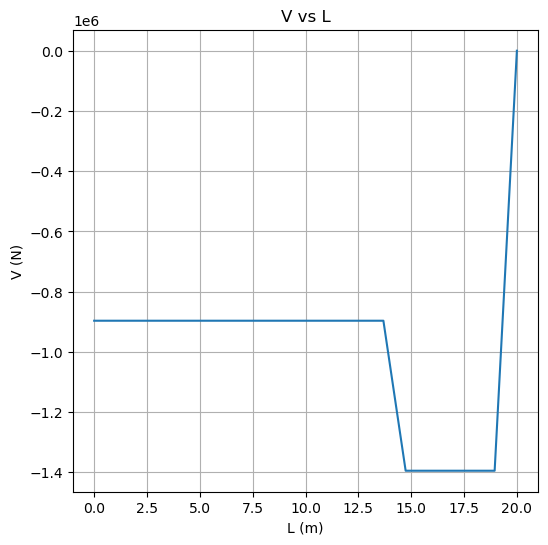

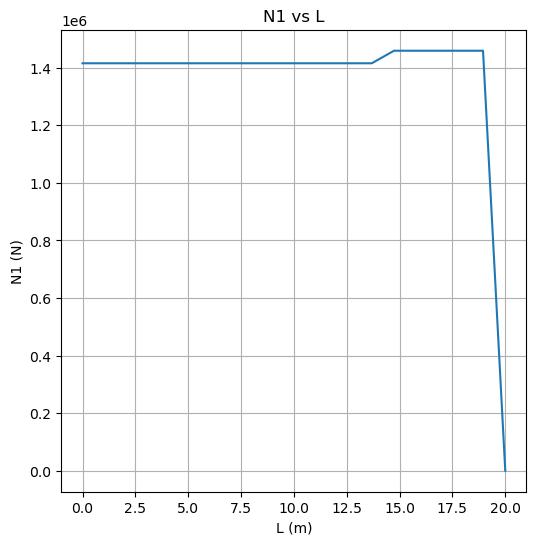

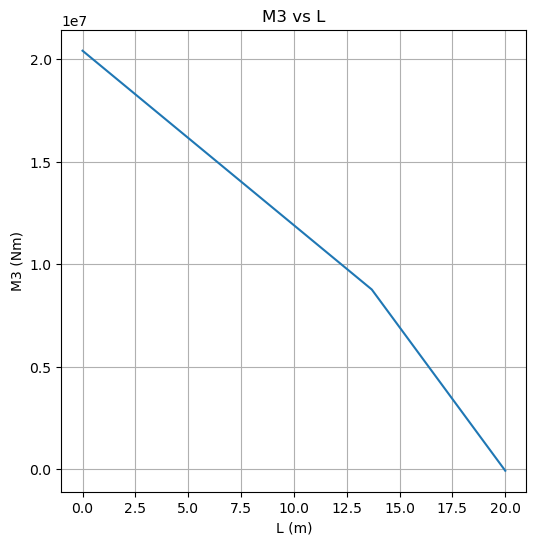

In [150]:
#EAE 135 Project 2
#Andrew Matel
#Nicholas Rusali

### Given Info
## Lengths
D = 3 #m
t_layers = 0.005 #m
L = 20 #m
Ri = 1.490 #m
Ra = 1.495 #m
Rc = 1.5 #m
## Forces
Thrust = 1250*(10**3) #N
Lift = 1400*(10**3) #N
Weight = 500*(10**3) #N
alf = math.radians(5) #rads

## Material Properties
#CFRP
E11_cfrp = 148.24*(10**9) #Pa
E22_cfrp = 10.07*(10**9) #Pa
G12_cfrp = 5.58*(10**9) #Pa
v12_cfrp = 0.30 
#Al 6061
syc_Al = -289.6 #MPa (yield stress in compression)
syt_Al = 289.6 #MPa
Ec_Al = 69.69*(10**9) #Pa
Et_Al = 68.95*(10**9) #Pa
G_Al = 26.2*(10**9) #Pa
v_Al = 0.33

### Reactions at Cantilever
R1 = Thrust + (Lift+Weight)*(math.sin(alf))
R2 = (Weight - Lift)*math.cos(alf)
M3 = (Weight*(L-5)-Lift*L)*math.cos(alf)

print('R1 = {} N'.format(R1))
print('R2 = {} N'.format(R2))
print('M3 = {} Nm'.format(M3))

### Internal Force Calculations
Shear = np.zeros(20)
for i in range(0,len(Shear)):
    if (i<14):
        Shear[i] = R2
    elif (i>=14) & (i<19):
        Shear[i] = R2 - Weight*(math.cos(alf))
    else:
        Shear[i] = R2 - (Weight - Lift)*math.cos(alf)

plt.figure(figsize = [6,6])
plt.title('V vs L')
plt.xlabel('L (m)')
plt.ylabel('V (N)')
plt.plot(np.linspace(0,20,20), Shear)
plt.grid()

N1 = np.zeros(20)
for i in range(0,len(N1)):
    if (i<14):
        N1[i] = R1
    elif (i>=14) & (i<19):
        N1[i] = R1 + Weight*(math.sin(alf))
    else:
        N1[i] = R1 - Thrust - (Lift+Weight)*(math.sin(alf))

plt.figure(figsize = [6,6])
plt.title('N1 vs L')
plt.xlabel('L (m)')
plt.ylabel('N1 (N)')
plt.plot(np.linspace(0,20,20), N1)
plt.grid()

Mom = np.zeros(20)
for i in range(0,len(Mom)):
    if (i<14):
        Mom[i] = -M3 + ((M3+(-M3+(R2*15)))/15)*i
    elif (i>=14):
        Mom[i] = Mom[13] - ((Mom[13]+(R2-Weight*math.cos(alf)))/5)*(i-13)

plt.figure(figsize = [6,6])
plt.title('M3 vs L')
plt.xlabel('L (m)')
plt.ylabel('M3 (Nm)')
plt.plot(np.linspace(0,20,20), Mom)
plt.grid()


In [151]:
###Axial Problem
x1 = np.linspace(0,20,20)
##Stiffness

#Al
A_Al = (math.pi)*((Ra**2)-(Ri**2))

#CFRP
#There is a different area occupied by each of the 8 layers:
t_cfrp_layers = (Rc-Ra)/8 #radial thickness of layers
A_0_1 = (math.pi)*(-(Ra**2)+(Ra+t_cfrp_layers)**2)
A_45_1 = (math.pi)*(-((Ra+t_cfrp_layers)**2)+(Ra+2*t_cfrp_layers)**2)
A_neg45_1 = (math.pi)*(-((Ra+2*t_cfrp_layers)**2)+(Ra+3*t_cfrp_layers)**2)
A_90_1 = (math.pi)*(-((Ra+3*t_cfrp_layers)**2)+(Ra+4*t_cfrp_layers)**2)
A_90_2 = (math.pi)*(-((Ra+4*t_cfrp_layers)**2)+(Ra+5*t_cfrp_layers)**2)
A_neg45_2 = (math.pi)*(-((Ra+5*t_cfrp_layers)**2)+(Ra+6*t_cfrp_layers)**2)
A_45_2 = (math.pi)*(-((Ra+6*t_cfrp_layers)**2)+(Ra+7*t_cfrp_layers)**2)
A_0_2 = (math.pi)*(-((Ra+7*t_cfrp_layers)**2)+(Ra+8*t_cfrp_layers)**2)

#axial stiffness
S = Ec_Al*A_Al + E11_cfrp*(A_0_1 + A_0_2) +E22_cfrp*(A_45_1+A_45_2+A_neg45_1+A_neg45_2+A_90_1+A_90_2)
##Displacement
#Displacement in axial direction due to the axial forces (using govering eqn)
#(d/dx1[S*(du1/dx1)]=-p1=0)

#Boundary Conditions
C1 = R1 #When x1 = 0, N1 = R1 
C2 = 0 #no displacement at root
u1 = (C1*x1)/S + C2

##Strain
#Axial strain due to axial load only N1 = axialstrain*S
axial_strain1 = np.zeros(len(N1))
for i in range(0, len(axial_strain1)):
    axial_strain1[i] = (N1[i])/S

##Stress
#Axial Stress due to axial load only
#stress = E*(N1)/S
axial_stress_Al = (Ec_Al*N1)/S
print(axial_stress_Al)
#--> Continued after Bending Section (needed to find Ex1x1 in that section)



[1.83832517e+07 1.83832517e+07 1.83832517e+07 1.83832517e+07
 1.83832517e+07 1.83832517e+07 1.83832517e+07 1.83832517e+07
 1.83832517e+07 1.83832517e+07 1.83832517e+07 1.83832517e+07
 1.83832517e+07 1.83832517e+07 1.89491639e+07 1.89491639e+07
 1.89491639e+07 1.89491639e+07 1.89491639e+07 3.77948987e-10]


In [152]:
#Bending Problem
v21_cfrp = E22_cfrp*(v12_cfrp/(E11_cfrp)) #relationship between v21 and v12

Q = np.array([[(E11_cfrp)/(1-v12_cfrp), (v21_cfrp*E11_cfrp)/(1-v12_cfrp*v21_cfrp), 0],
     [(v12_cfrp*E22_cfrp)/(1-v12_cfrp), E22_cfrp/(1-v12_cfrp), 0],
     [0,0,G12_cfrp]])

def makeTmatrix(beta):
        #This function takes each of the angles of the CFRP and produces a rotation matrix T
        T = np.array([[(math.cos(beta))**2,(math.sin(beta))**2, 2*math.sin(beta)*math.cos(beta)],[(math.sin(beta))**2, (math.cos(beta))**2, -2*math.sin(beta)*math.cos(beta)],[-math.sin(beta)*math.cos(beta), math.sin(beta)*math.cos(beta), (math.cos(beta))**2 - (math.sin(beta))**2 ]])
        return T

T_0 = makeTmatrix(0)
T_neg45 = makeTmatrix(-((math.pi)/4))
T_45 = makeTmatrix((math.pi)/4)
T_90 = makeTmatrix(((math.pi)/2))

R = np.array([[1,0,0],[0,1,0],[0,0,2]]) #Reuter's Matrix
def makeQbar(T, R, Q):
        #This function transforms Q into Qbar using the T and R matrices
        Qbar = np.matmul(np.linalg.inv(T), Q)
        Qbar = np.matmul(Qbar,R)
        Qbar = np.matmul(Qbar,T)
        Qbar = np.matmul(Qbar,np.linalg.inv(R))
        return Qbar

Qbar_0 = makeQbar(T_0, R, Q)
Qbar_neg45 = makeQbar(T_neg45, R, Q)
Qbar_45 = makeQbar(T_45, R, Q)
Qbar_90 = makeQbar(T_90, R, Q)
print(Qbar_0)

#Here, we define the Sbar matrix which is the inverse of the Qbar matrix
Sbar_0 = np.linalg.inv(Qbar_0)
Sbar_neg45 = np.linalg.inv(Qbar_neg45)
Sbar_45 = np.linalg.inv(Qbar_45)
Sbar_90 = np.linalg.inv(Qbar_90)

#All we have to do to solve for Ex1x1 is to take the (1,1) term of each Sbar matrix and divde 1 by it
Ex1x1_0 = 1/(Sbar_0[0,0])
Ex1x1_neg45 = 1/(Sbar_neg45[0,0])
Ex1x1_45 = 1/(Sbar_45[0,0])
Ex1x1_90 = 1/(Sbar_90[0,0])

print(Ex1x1_0)

#H33c = w*sum(Ex1x1*(x2i+1**3-x2i**3)/3)
#To allow for this equation to function for circular cross-sections, I have taken the average circumference of each layer to be the width w
#The Modulus-Weighted Centroid is at the center of the tube

Ex1x1_cfrp = [Ex1x1_0, Ex1x1_45, Ex1x1_neg45, Ex1x1_90, Ex1x1_90, Ex1x1_neg45, Ex1x1_45, Ex1x1_0]
print(Ex1x1_cfrp)
layer_H33c = np.zeros(8)
for i in range(0, len(layer_H33c)):
        layer_H33c[i] = (2*math.pi)*((Ri + i*t_cfrp_layers + Ri + (i+1)*t_cfrp_layers)/2)*(Ex1x1_cfrp[i])*((((Ri+(i+1)*t_cfrp_layers)**3)-((Ri+(i)*t_cfrp_layers)**3))/3)

H33c = sum(layer_H33c)
#Not exactly sure how to incorporate Aluminum
print(H33c)

## This is essentially what I am doing with this loop (not sure if it's correct)
#cfrp_0 = ((Ri+Ri+t_cfrp_layers)/2)*(Ex1x1_0)*(-(Ri**3)+(Ri+t_cfrp_layers)**3)/3
#cfrp_45 = ((Ri+t_cfrp_layers+Ri+2*t_cfrp_layers)/2)*(Ex1x1_45)*((-(Ri+t_cfrp_layers)**3)+((Ri+2*t_cfrp_layers)**3))/3
#cfrp_neg45 = ((Ri+2*t_cfrp_layers+Ri+3*t_cfrp_layers)/2)*(Ex1x1_neg45)*(-((Ri+2*t_cfrp_layers)**3)+((Ri+3*t_cfrp_layers)**3))/3
#cfrp_90 = ((Ri+3*t_cfrp_layers+Ri+4*t_cfrp_layers)/2)*(Ex1x1_90)*(-((Ri+3*t_cfrp_layers)**3)+((Ri+4*t_cfrp_layers)**3))/3
#cfrp_902 = ((Ri+4*t_cfrp_layers+Ri+5*t_cfrp_layers)/2)*(Ex1x1_90)*(-((Ri+4*t_cfrp_layers)**3)+((Ri+5*t_cfrp_layers)**3))/3
#cfrp_neg452 = ((Ri+5*t_cfrp_layers+Ri+6*t_cfrp_layers)/2)*(Ex1x1_neg45)*(-((Ri+5*t_cfrp_layers)**3)+((Ri+6*t_cfrp_layers)**3))/3
#cfrp_452 = ((Ri+6*t_cfrp_layers+Ri+7*t_cfrp_layers)/2)*(Ex1x1_45)*(-((Ri+6*t_cfrp_layers)**3)+((Ri+7*t_cfrp_layers)**3))/3
#cfrp_02 = ((Ri+7*t_cfrp_layers+Ri+8*t_cfrp_layers)/2)*(Ex1x1_0)*(-((Ri+7*t_cfrp_layers)**3)+((Ri+8*t_cfrp_layers)**3))/3
#H33c = (2*math.pi)*(cfrp_0 +cfrp_45+cfrp_neg45+cfrp_90+cfrp_902+cfrp_neg452+cfrp_452+cfrp_02)


        



[[2.11771429e+11 3.03958320e+09 0.00000000e+00]
 [4.31571429e+09 1.43857143e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.58000000e+09]]
210859553610.03143
[210859553610.03143, 15914495486.923817, 15914495486.923817, 14323770270.190344, 14323770270.190344, 15914495486.923817, 15914495486.923817, 210859553610.03143]
6711031232.626369


In [153]:
#Finishing Axial Stress due to axial load only
axial_stress_cfrp = np.zeros((8,20))
for i in range(0, 8):
    for j in range(0, L):
        axial_stress_cfrp[i,j] = (Ex1x1_cfrp[i]*N1[j])/S



for i in range(0, 8):
    print(axial_stress_cfrp[i,0])



55621814.46641805
4198022.3335643625
4198022.3335643625
3778411.1688938867
3778411.1688938867
4198022.3335643625
4198022.3335643625
55621814.46641805


i
1.495625


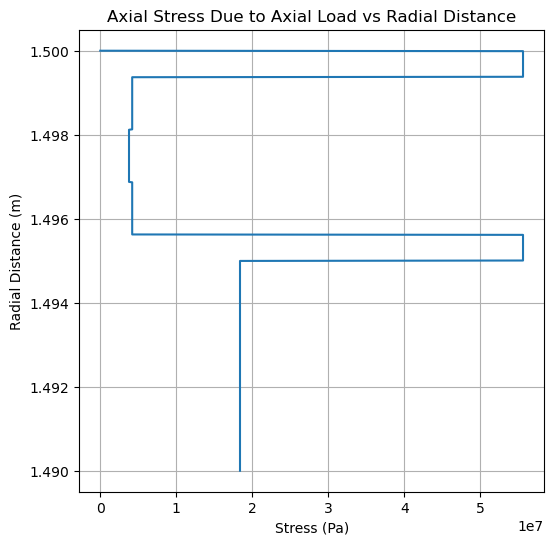

In [154]:
#Axial Stress due to axial load vs x2 position
Root_axial_stress = np.zeros(1000)
r = np.linspace(Ri, Rc, 1000)

for i in range(0, len(r)):
    if r[i] < Ri:
        Root_axial_stress[i] = 0
    elif (r[i]>=Ri) and (r[i]<Ra):
        Root_axial_stress[i] = axial_stress_Al[0]
    elif (r[i] >=Ra) and (r[i] < (Ra+t_cfrp_layers)):
        Root_axial_stress[i] = axial_stress_cfrp[0,0]
    elif (r[i]>=Ra+t_cfrp_layers) and (r[i]<(Ra+2*t_cfrp_layers)):
        Root_axial_stress[i] = axial_stress_cfrp[1,0]
    elif (r[i]>=Ra+2*t_cfrp_layers) and (r[i]<(Ra+3*t_cfrp_layers)):
            Root_axial_stress[i] = axial_stress_cfrp[2,0]
    elif (r[i]>=Ra+3*t_cfrp_layers) and (r[i]< (Ra+4*t_cfrp_layers)):
            Root_axial_stress[i] = axial_stress_cfrp[3,0]
    elif (r[i]>=Ra+4*t_cfrp_layers) and (r[i]<(Ra+5*t_cfrp_layers)):
        Root_axial_stress[i] = axial_stress_cfrp[4,0]
    elif (r[i]>=Ra+5*t_cfrp_layers) and (r[i]<(Ra+6*t_cfrp_layers)):
        Root_axial_stress[i] = axial_stress_cfrp[5,0]
    elif (r[i]>=Ra+6*t_cfrp_layers) and (r[i]<(Ra+7*t_cfrp_layers)):
        Root_axial_stress[i] = axial_stress_cfrp[6,0]
    elif (r[i]>=Ra+7*t_cfrp_layers) and (r[i]<(Ra+8*t_cfrp_layers)):
        Root_axial_stress[i] = axial_stress_cfrp[7,0]
    else:
         print('i')

plt.figure(figsize = [6,6])
plt.title('Axial Stress Due to Axial Load vs Radial Distance')
plt.xlabel('Stress (Pa)')
plt.ylabel('Radial Distance (m)')
plt.plot(Root_axial_stress, r)
plt.grid()

print(Ra+t_cfrp_layers)

